In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import tensorflow as tf
import torch.nn as nn
import pandas as pd
import torch

In [2]:
training_df = pd.read_csv('housepricetrain_data.csv')
testing_df = pd.read_csv('housepricetest_data.csv')

In [3]:
training_dataset = torch.tensor(training_df.values)
testing_dataset = torch.tensor(testing_df.values)

print(training_dataset)
print(testing_dataset)

tensor([[ 8450,     7,     5,  ...,     0,   548,     1],
        [ 9600,     6,     8,  ...,     1,   460,     1],
        [11250,     7,     5,  ...,     1,   608,     1],
        ...,
        [ 4712,     4,     7,  ...,     0,   305,     0],
        [10659,     5,     6,  ...,     0,   368,     0],
        [11717,     6,     6,  ...,     1,   615,     1]])
tensor([[ 9786,     3,     4,  ...,     1,   210,     0],
        [ 6762,     7,     5,  ...,     0,   632,     1],
        [10206,     3,     3,  ...,     0,   528,     0],
        ...,
        [ 9042,     7,     9,  ...,     2,   252,     1],
        [ 9717,     5,     6,  ...,     0,   240,     0],
        [ 9937,     5,     6,  ...,     0,   276,     0]])


***Now, we split the dataset into our input features and the label we wish to predict.***

In [4]:
X = training_dataset[:,0:10]
Y = training_dataset[:,10]

***Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.***

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [6]:
X_scale = torch.tensor(X_scale)
print(X_scale)

tensor([[0.0334, 0.6667, 0.5000,  ..., 0.5000, 0.0000, 0.3942],
        [0.0388, 0.5556, 0.8750,  ..., 0.3333, 0.3333, 0.3309],
        [0.0465, 0.6667, 0.5000,  ..., 0.3333, 0.3333, 0.4374],
        ...,
        [0.0159, 0.3333, 0.7500,  ..., 0.2500, 0.0000, 0.2194],
        [0.0437, 0.4444, 0.6250,  ..., 0.3333, 0.0000, 0.2647],
        [0.0487, 0.5556, 0.6250,  ..., 0.3333, 0.3333, 0.4424]],
       dtype=torch.float64)


In [7]:
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_train = X_scale
Y_train = Y

X_train
Y_train

tensor([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,

In [8]:
# X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [9]:
# print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [10]:
train_dataloader = DataLoader(training_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing_dataset, batch_size=32, shuffle=True)

In [11]:
n_input, n_hidden, n_out, batch_size, learning_rate = 10, 30, 1, 32, 0.01

In [12]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.ReLU(),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
  (3): ReLU()
  (4): Sigmoid()
)


In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
loss_function = nn.MSELoss()

In [15]:
losses = []
for epoch in range(100):
    pred_y = model(X_train.float())
    loss = loss_function(pred_y, Y_train.float())
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

c:\Users\Vikas Jadaun\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([998])) that is different to the input size (torch.Size([998, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


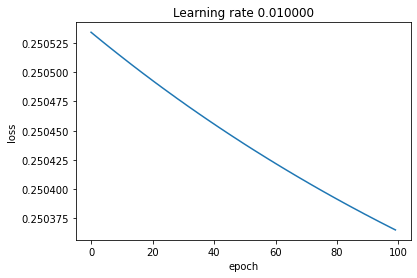

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [17]:
print(losses)

[0.2505342364311218, 0.2505320608615875, 0.2505299150943756, 0.2505277693271637, 0.2505256235599518, 0.25052350759506226, 0.25052139163017273, 0.2505193054676056, 0.25051721930503845, 0.2505151331424713, 0.25051307678222656, 0.2505110204219818, 0.25050896406173706, 0.2505069077014923, 0.25050488114356995, 0.25050288438796997, 0.2505008578300476, 0.25049886107444763, 0.25049689412117004, 0.25049492716789246, 0.2504929304122925, 0.2504909634590149, 0.2504890561103821, 0.2504870891571045, 0.2504851818084717, 0.25048327445983887, 0.25048136711120605, 0.25047948956489563, 0.25047755241394043, 0.2504757046699524, 0.25047385692596436, 0.25047194957733154, 0.2504701018333435, 0.25046828389167786, 0.2504664659500122, 0.25046461820602417, 0.2504628300666809, 0.25046101212501526, 0.250459223985672, 0.25045743584632874, 0.25045567750930786, 0.2504538893699646, 0.2504521310329437, 0.25045040249824524, 0.25044864416122437, 0.2504469156265259, 0.2504451870918274, 0.2504434883594513, 0.250441789627075